In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as nup

In [10]:
def plotofimage(img1, img2, title1="Orignal", title2="New Image"):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap="gray")
    plt.title(title1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title(title2)
    plt.show()

In [11]:
def plotofhistogram(oldimg, newimg, oldtitle="Orignal", newtitle="New Image"):
    valuesofintensity = nup.array([i for i in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(
        valuesofintensity,
        cv2.calcHist([oldimg], [0], None, [256], [0, 256])[:, 0],
        width=5,
    )
    plt.title(oldtitle)
    plt.xlabel("intensity")
    plt.subplot(1, 2, 2)
    plt.bar(
        valuesofintensity,
        cv2.calcHist([newimg], [0], None, [256], [0, 256])[:, 0],
        width=5,
    )
    plt.title(newtitle)
    plt.xlabel("intensity")
    plt.show()

how and read image

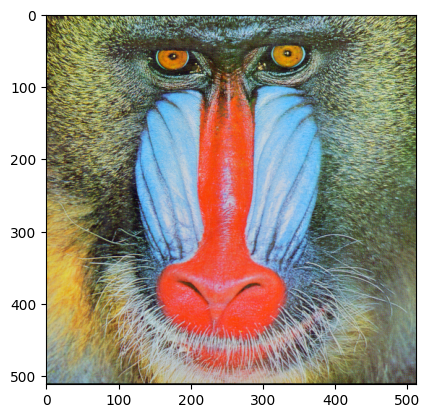

In [12]:
my_img = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
plt.show()

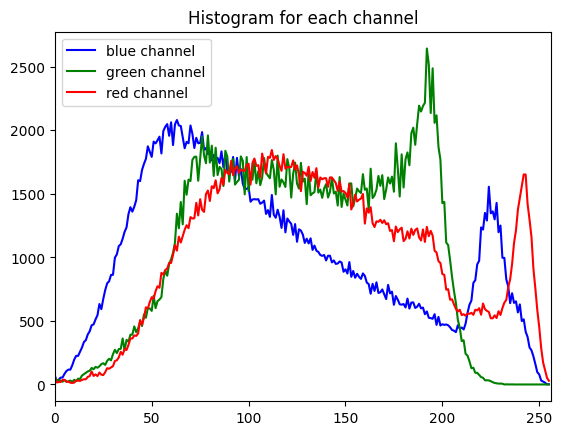

In [13]:
Histogram = cv2.calcHist([my_img], [0], None, [256], [0, 256])
valuesofintensity = nup.array([i for i in range(Histogram.shape[0])])
color = ("blue", "green", "red")
for x, y in enumerate(color):
    H = cv2.calcHist([my_img], [x], None, [256], [0, 256])
    plt.plot(valuesofintensity, H, color=y, label=y + " channel")
    plt.xlim([0, 256])
plt.legend()
plt.title("Histogram for each channel")
plt.show()

Increase contrast

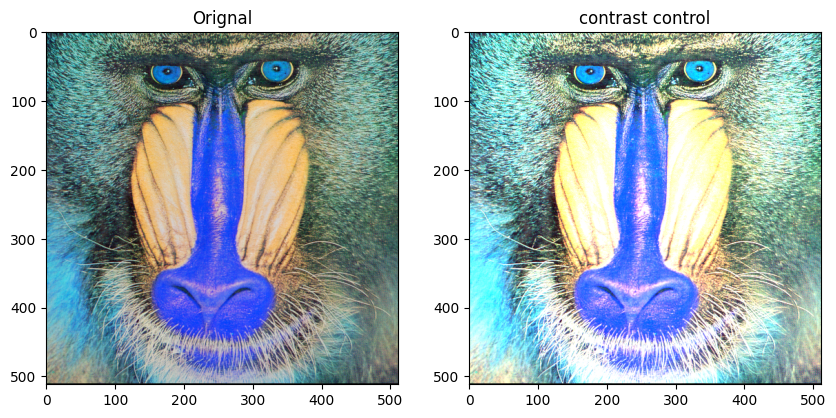

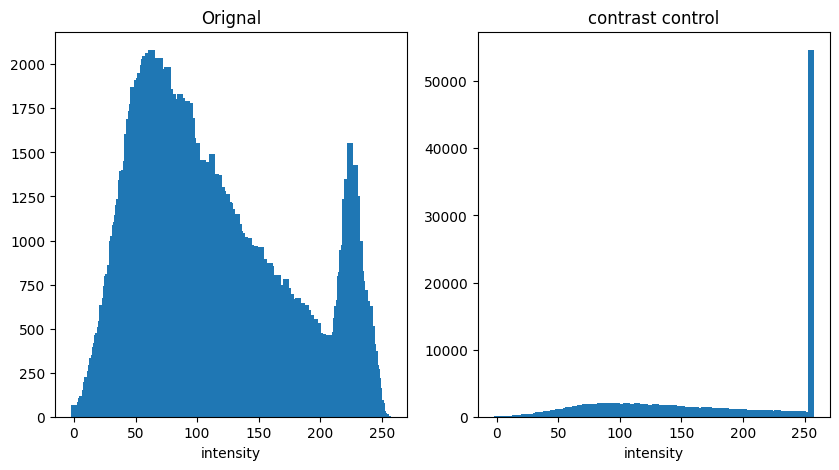

In [14]:
alpha = 1.5
beta = 0
newimg = cv2.convertScaleAbs(my_img, alpha=alpha, beta=beta)
plotofimage(my_img, newimg, "Orignal", "contrast control")
plt.figure(figsize=(10, 5))
plotofhistogram(my_img, newimg, "Orignal", "contrast control")

Decrease brightness

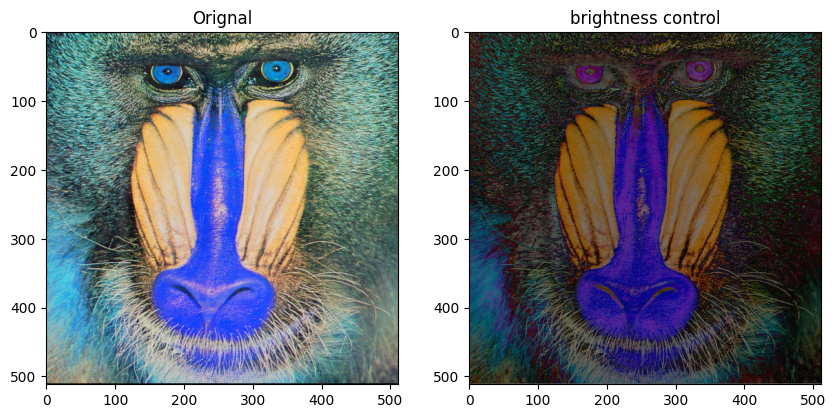

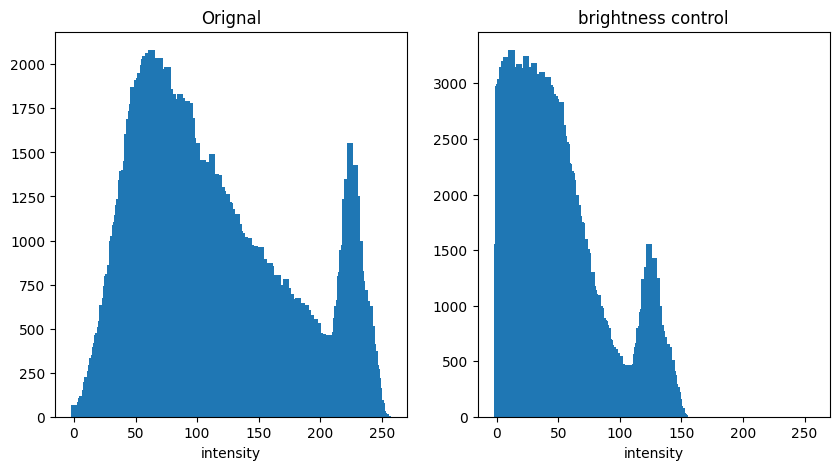

In [15]:
alpha = 1
beta = -100
newimg = cv2.convertScaleAbs(my_img, alpha=alpha, beta=beta)
plotofimage(my_img, newimg, title1="Orignal", title2="brightness control")
plt.figure(figsize=(10, 5))
plotofhistogram(my_img, newimg, "Orignal", "brightness control")

Histogram eualization

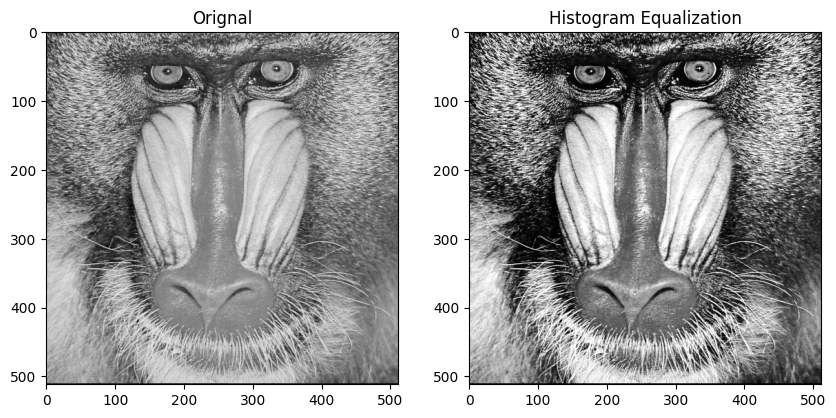

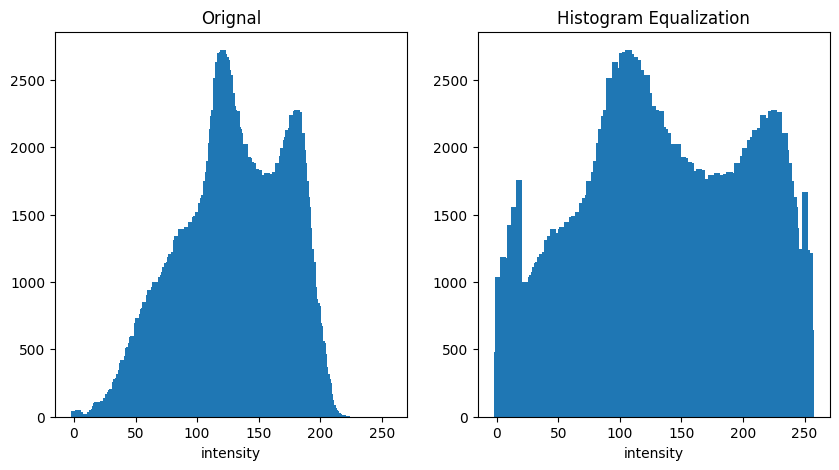

In [16]:
B = cv2.imread("baboon.png", cv2.IMREAD_GRAYSCALE)
newimg = cv2.equalizeHist(B)
plotofimage(B, newimg, "Orignal", "Histogram Equalization")
plt.figure(figsize=(10, 5))
plotofhistogram(B, newimg, "Orignal", "Histogram Equalization")